# Heath and Self
## Time Series Data Visualization in Python

Adapted for health and self data, specifically personal data on sleep and activity, this notebook first walks through several univariate data visualization techniques for our sleep and steps time-oriented data using Python, Pandas and Matplotlib: 

- Line Plots.
- Histograms and Density Plots.
- Box and Whisker Plots.
- Heat Maps.
- Lag Plots or Scatter Plots.
- Autocorrelation Plots.

After using a multivariate, moving averages and visuualziations, we examine any visual ways that show patterns. 

## Libraries and Import Data

In [1]:
import datetime
import numpy as np
import pandas as pd
from pandas import TimeGrouper
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# let's use a better styling that default
plt.style.use('fivethirtyeight')

# Univariate Time Series Analysis

### Import Data

In [2]:
# apple watch user
# series = pd.Series.from_csv('data/apple_watch_01/daily_sleep.csv', header=0)
series = pd.Series.from_csv('data/apple_watch_01/daily_steps.csv', header=0)
series = series.tail(365)

# fitbit user
# series = pd.Series.from_csv('data/fitbit_01/daily_sleep.csv', header=0)
# series = pd.Series.from_csv('data/fitbit_02/daily_steps.csv', header=0)
# series = pd.Series.from_csv('data/fitbit_02/daily_sleep.csv', header=0)
# series = pd.Series.from_csv('data/fitbit_02/daily_steps.csv', header=0)
print(series.tail())

Date
2019-08-08    10627
2019-08-09     5342
2019-08-10    12245
2019-08-11    10119
2019-08-12     9675
Name: Steps, dtype: int64


## 1. Time Series Line Plot

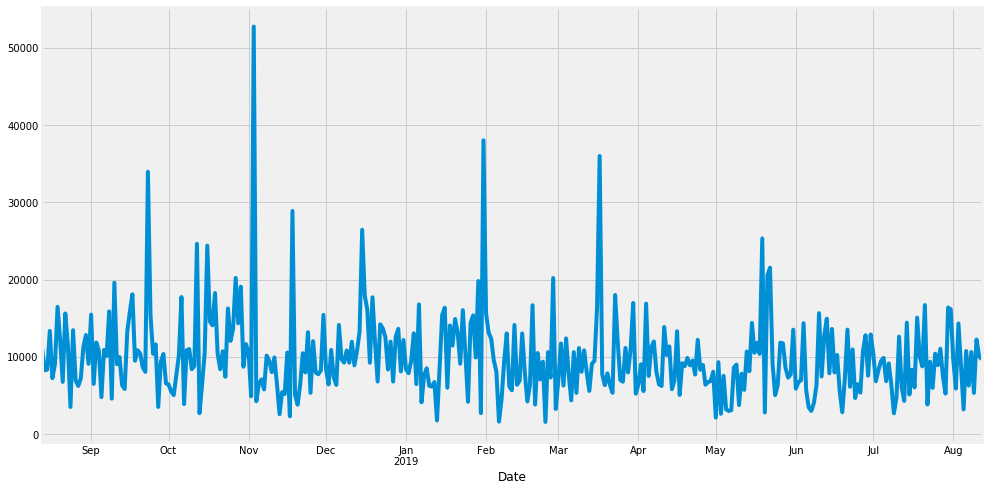

In [3]:
fig = plt.figure(figsize=(15,8))
series.plot()
plt.show()

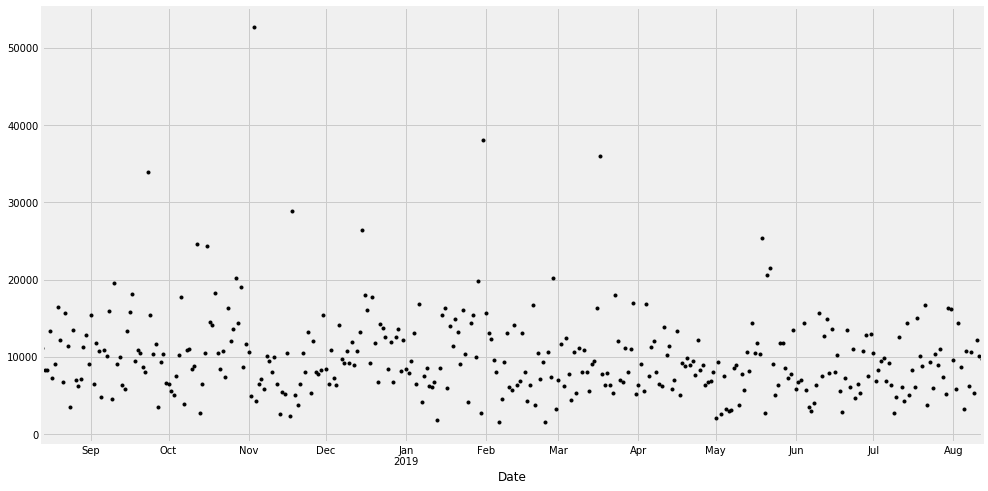

In [4]:
fig = plt.figure(figsize=(15,8))
series.plot(style='k.')
plt.show()

## 2. Time Series Histogram and Density Plots

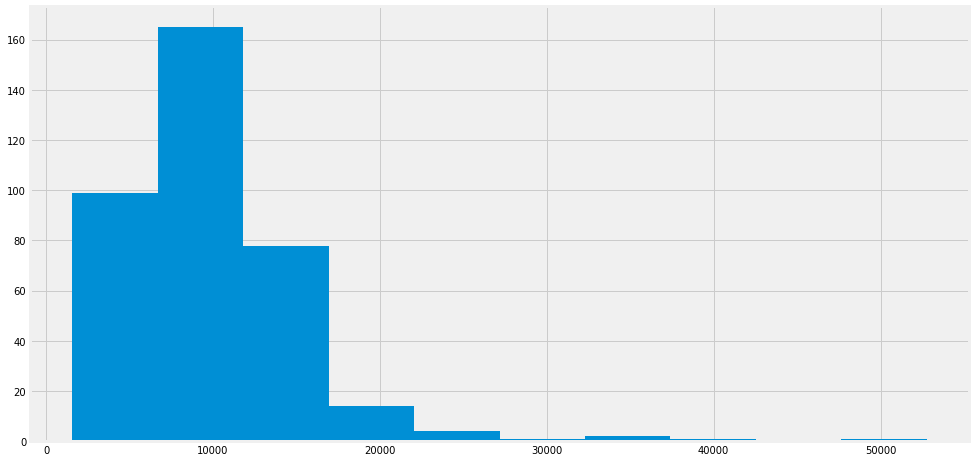

In [5]:
fig = plt.figure(figsize=(15,8))
series.hist()
plt.show()

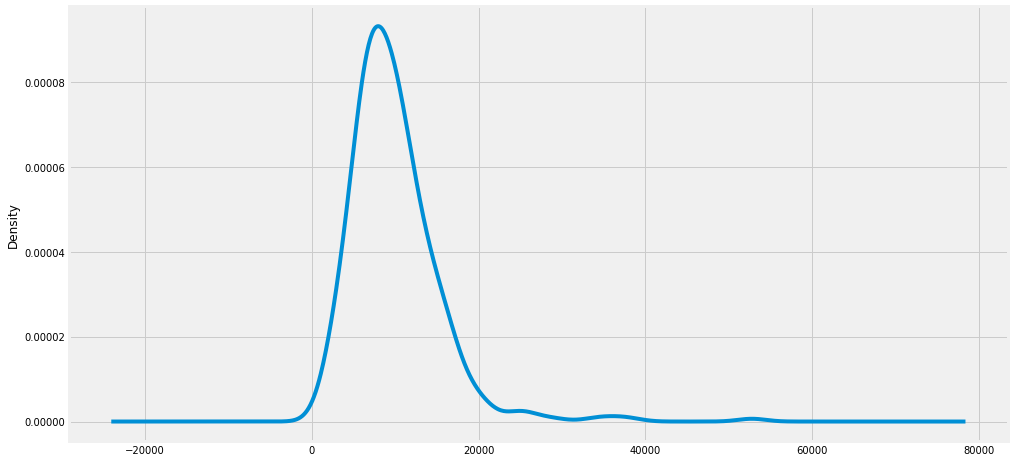

In [6]:
fig = plt.figure(figsize=(15,8))
series.plot(kind='kde')
plt.show()

## 3. Time Series Box and Whisker Plots by Interval

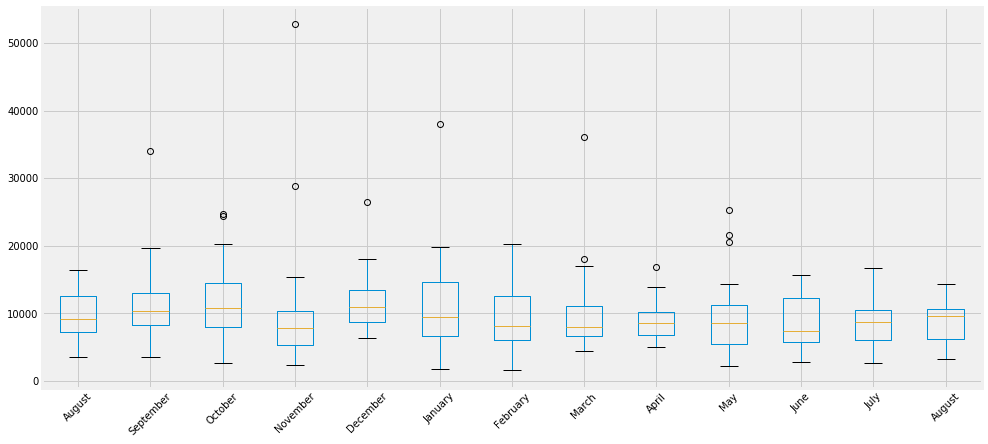

In [7]:
fig = plt.figure(figsize=(15,7))
groups = series.groupby(TimeGrouper('M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
month_names = []
for key in groups.groups.keys():
    month_names.append(key.strftime("%B")) 
months.columns = month_names
months.boxplot()
plt.xticks(rotation=45)
plt.show()

## 3b. Time Series Box and Whisker Plots by Day of Week

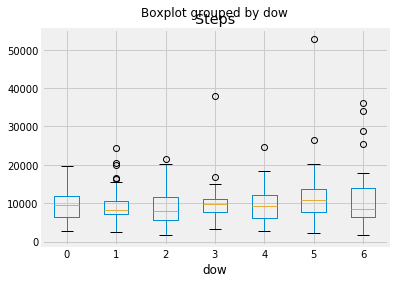

In [8]:
df = pd.DataFrame(series.transpose())
df['Date'] = pd.to_datetime(df.index)
df['dow'] = df['Date'].dt.weekday
df['day_of_week'] = df['Date'].dt.weekday_name

value_name = df.columns[0]
boxplot = df.boxplot(column=[value_name], by='dow')

## 4. Time Series Heat Maps

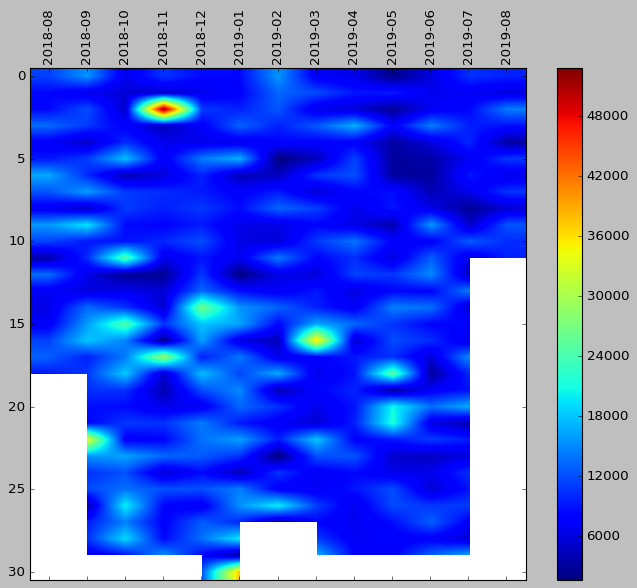

In [9]:
# better use classic to highlight this
plt.style.use('classic')

groups = series.groupby(TimeGrouper('M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
month_names = []
for key in groups.groups.keys():
    month_names.append(key.strftime("%Y-%m")) 
months.columns = month_names

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

cax = ax.matshow(months, interpolation=None, aspect='auto')
fig.colorbar(cax)

plt.xticks(np.arange(len(month_names)), month_names, rotation=90)
plt.show()

## 5. Time Series Lag Scatter Plots

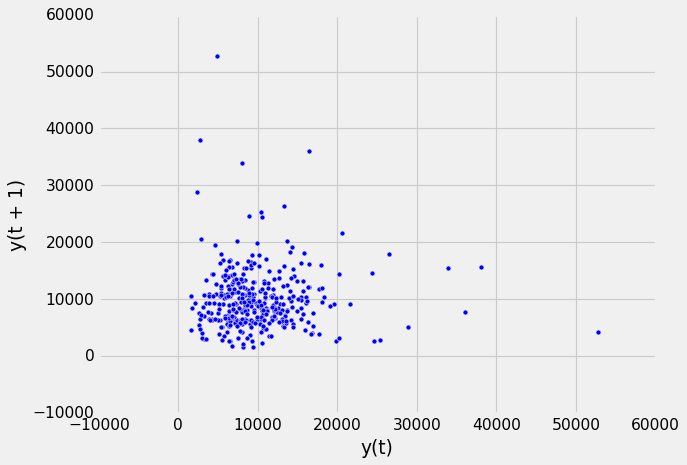

In [10]:
plt.style.use('fivethirtyeight')
# alternative from pandas.plotting import lag_plot
pd.plotting.lag_plot(series)
plt.show()

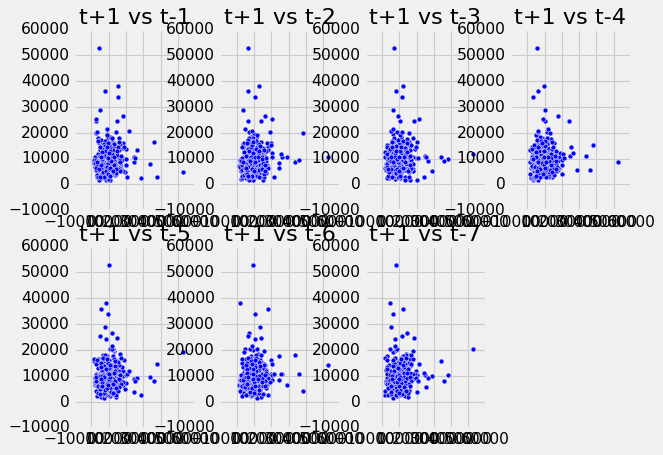

In [11]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

## 6. Time Series Autocorrelation Plots

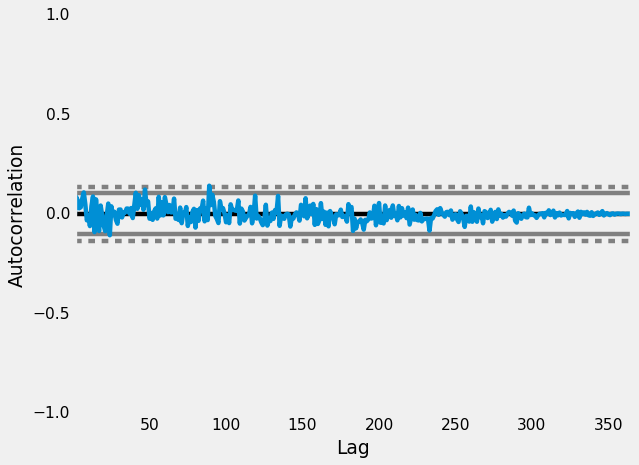

In [12]:
pd.plotting.autocorrelation_plot(series)
plt.show()

# Multivariate Analysis

### Import Data

In [13]:
# apple watch user
s1 = pd.Series.from_csv('data/apple_watch_01/daily_sleep.csv', header=0)
s2 = pd.Series.from_csv('data/apple_watch_01/daily_steps.csv', header=0)

# fitbit user
# s1 = pd.Series.from_csv('data/fitbit_01/daily_sleep.csv', header=0)
# s2 = pd.Series.from_csv('data/fitbit_01/daily_steps.csv', header=0)
# s1 = pd.Series.from_csv('data/fitbit_02/daily_sleep.csv', header=0)
# s2 = pd.Series.from_csv('data/fitbit_02/daily_steps.csv', header=0)

df = pd.concat([s1, s2], axis=1)
df = df.tail(365)
df['Sleep Hours'] = round(df['Sleep'] / 60, 2)

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name

print(df.tail())
len(df)

            Sleep  Steps  Sleep Hours  Year  Month Weekday Name
Date                                                           
2019-08-08  444.0  10627         7.40  2019      8     Thursday
2019-08-09  448.0   5342         7.47  2019      8       Friday
2019-08-10  429.0  12245         7.15  2019      8     Saturday
2019-08-11  411.0  10119         6.85  2019      8       Sunday
2019-08-12  454.0   9675         7.57  2019      8       Monday


365

## Line Plot

Text(0.5, 0.98, 'Raw: Sleep vs. Steps')

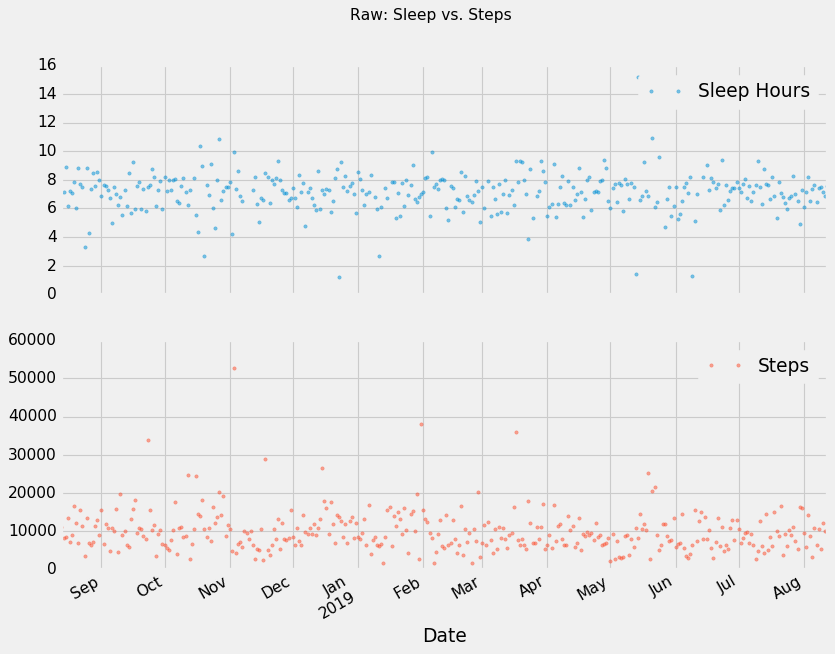

In [14]:
cols_plot = ['Sleep Hours', 'Steps']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
plt.suptitle("Raw: Sleep vs. Steps")

## Box Plot

Text(0.5, 0.98, 'Monthly: Sleep vs. Steps')

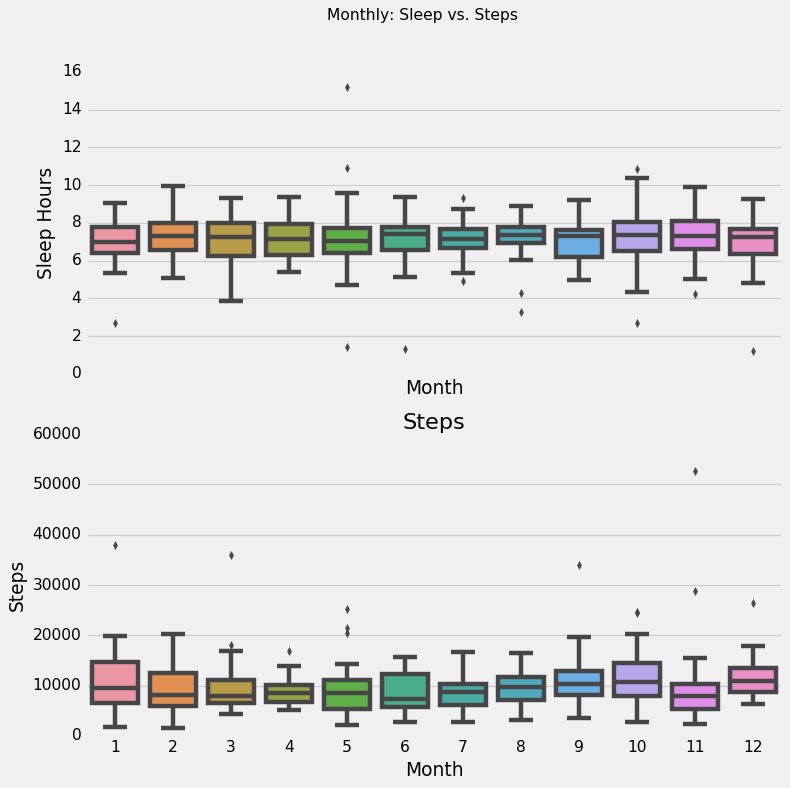

In [15]:
cols_plot = ['Sleep Hours', 'Steps']
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
for name, ax in zip(cols_plot, axes):
    # print(name)
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.suptitle("Monthly: Sleep vs. Steps")    

## Rolling Averages

In [16]:
df['Sleep Hours (7-Day Rolling)'] = df['Sleep Hours'].rolling(7, center=True).mean()
df['Sleep (Monthly)'] = df['Sleep Hours'].rolling(window=28, center=True, min_periods=20).mean()

df['Steps (7-Day Rolling)'] = df['Steps'].rolling(7, center=True).mean()
df['Steps (Monthly)'] = df['Steps'].rolling(window=28, center=True, min_periods=20).mean()

df.head(10)

,Sleep,Steps,Sleep Hours,Year,Month,Weekday Name,Sleep Hours (7-Day Rolling),Sleep (Monthly),Steps (7-Day Rolling),Steps (Monthly)
Date,,,,,,,,,,
2018-08-13,425.0,11183,7.08,2018,8,Monday,NaN,NaN,NaN,NaN
2018-08-14,431.0,8276,7.18,2018,8,Tuesday,NaN,NaN,NaN,NaN
2018-08-15,533.0,8347,8.88,2018,8,Wednesday,NaN,NaN,NaN,NaN
2018-08-16,371.0,13359,6.18,2018,8,Thursday,7.347143,NaN,10567.142857,NaN
2018-08-17,433.0,7243,7.22,2018,8,Friday,7.195714,NaN,10712.857143,NaN
2018-08-18,424.0,9082,7.07,2018,8,Saturday,7.427143,NaN,10497.142857,NaN
2018-08-19,469.0,16480,7.82,2018,8,Sunday,7.261429,7.233500,11536.428571,10304.050000
2018-08-20,361.0,12203,6.02,2018,8,Monday,7.454286,7.254286,11263.428571,10123.333333
2018-08-21,528.0,6766,8.80,2018,8,Tuesday,6.894286,7.267727,10731.142857,10202.318182


Text(0.5, 0.98, '7-Day Rolling Average: Sleep vs. Steps')

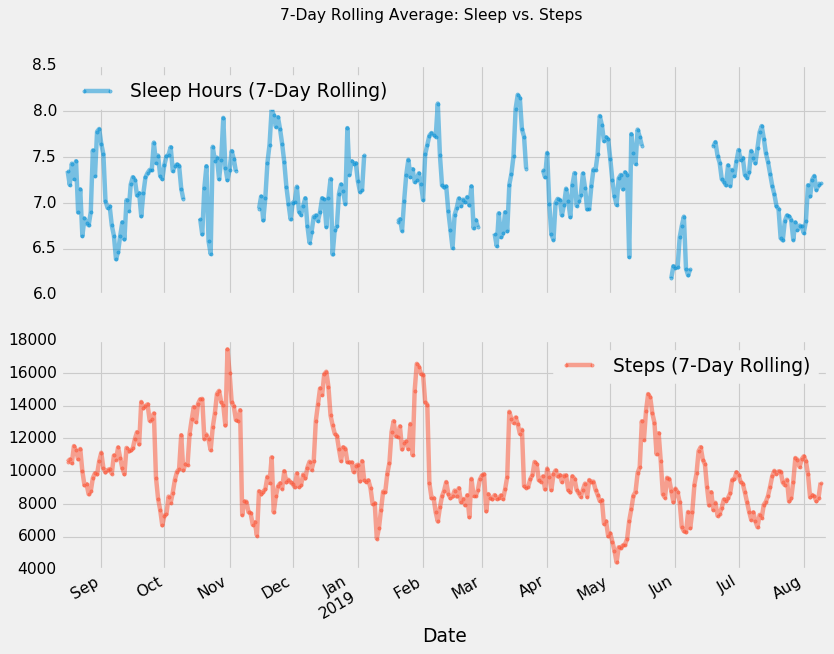

In [17]:
cols_plot = ['Sleep Hours (7-Day Rolling)', 'Steps (7-Day Rolling)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
plt.suptitle("7-Day Rolling Average: Sleep vs. Steps")

Sleep Hours (7-Day Rolling)
Sleep (Monthly)


Text(0, 0.5, 'Sleep Hours')

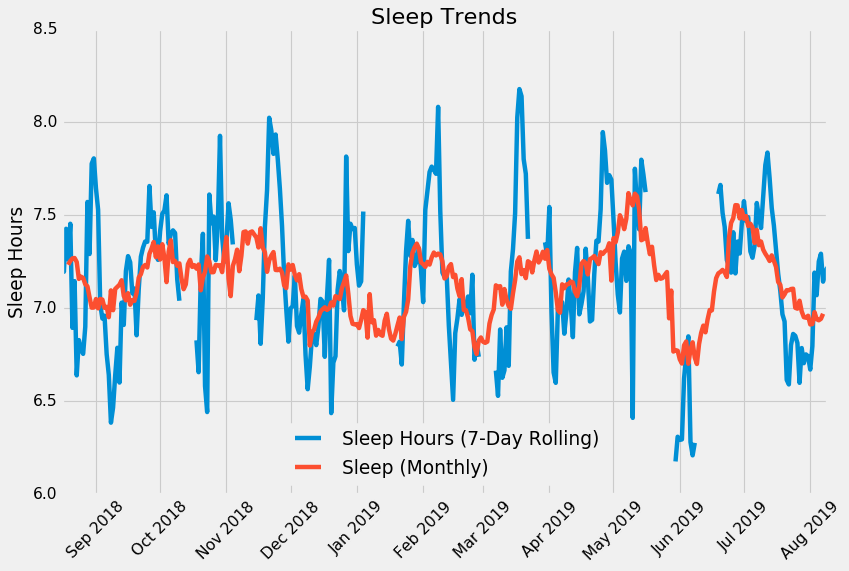

In [18]:
cols_plot = ['Sleep Hours (7-Day Rolling)', 'Sleep (Monthly)']
fig, ax = plt.subplots(figsize=(11, 7))
for nm in cols_plot:
    ax.plot(df[nm], label=nm)
    print(nm)

ax.legend(loc='lower center')
ax.set_title("Sleep Trends")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel('Sleep Hours')

Steps (7-Day Rolling)
Steps (Monthly)


Text(0, 0.5, 'Sleep Hours')

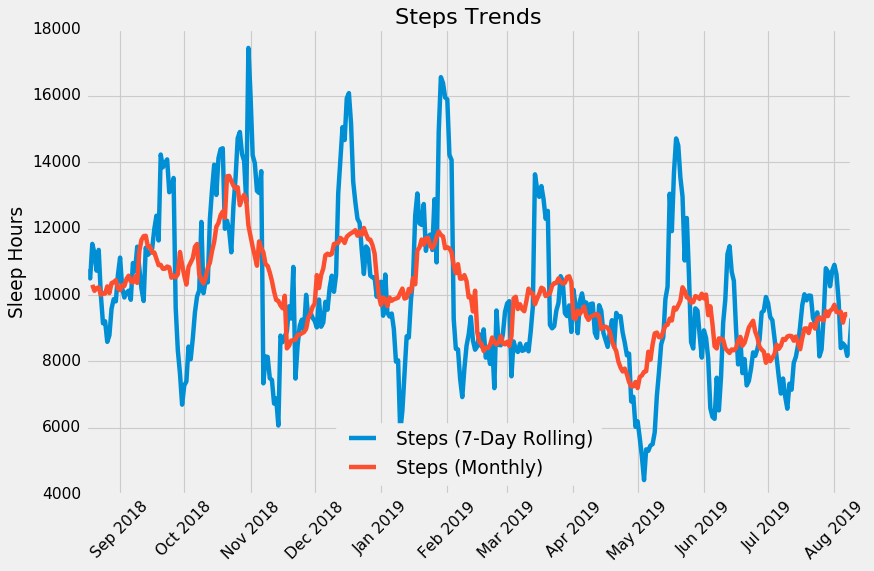

In [19]:
cols_plot = ['Steps (7-Day Rolling)', 'Steps (Monthly)']
fig, ax = plt.subplots(figsize=(11, 7))
for nm in cols_plot:
    ax.plot(df[nm], label=nm)
    print(nm)

ax.legend(loc='lower center')
ax.set_title("Steps Trends")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel('Sleep Hours')